<a href="https://colab.research.google.com/github/kategimranova/Face-Recognition-and-Reconstruction-using-SVD/blob/main/Face_Recognition_and_Reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
import numpy as np
from sklearn.model_selection import train_test_split

# Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=20)
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1, stratify=y)

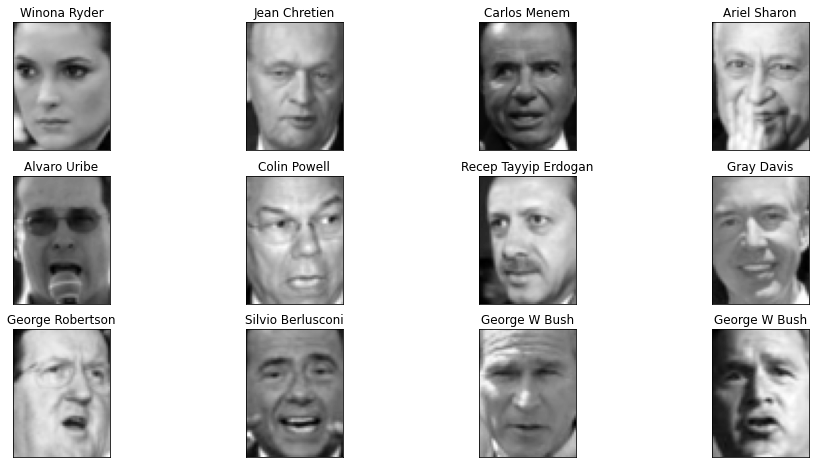

In [2]:
# Visualization
def plot_gallery(images, y, target_names, h, w, rows=3, cols=4):
    plt.figure(figsize=(16,8))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(target_names[y[i]])
        plt.xticks(())
        plt.yticks(())

plot_gallery(X, y, target_names, h, w)

Person: Alejandro Toledo


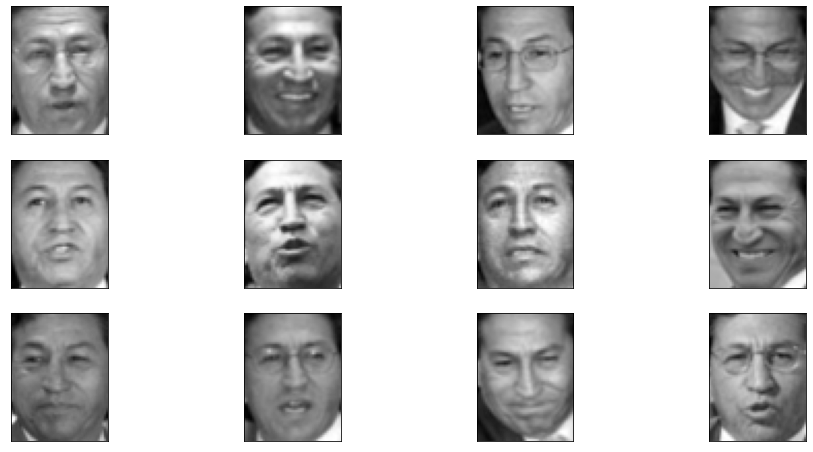

In [3]:
#Vizualization of different images of one person
subset = X[y==0]
def plot_person(images, y, target_names, h, w, rows=3, cols=4):
    print('Person:',target_names[0])
    plt.figure(figsize=(16,8))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    

plot_person(subset, y, target_names, h, w)

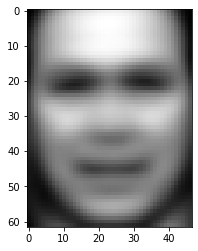

In [4]:
#Compute average face
avgFace = np.mean(train_X, axis=0)
#Plot average face
fig = plt.figure()
plt.imshow(avgFace.reshape((h, w)), cmap=plt.cm.gray)

In [5]:
#Substract average face
trainFaces = train_X - np.tile(avgFace,(train_X.shape[0],1))
#Compute SVD
U, Sigma, VT = np.linalg.svd(trainFaces.T, full_matrices=False)

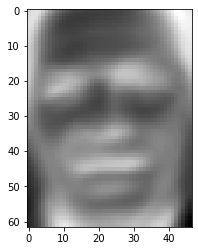

In [7]:
#Plot example of eigen face
plt.figure()
plt.imshow(U[:,6].reshape((h, w)), cmap=plt.cm.gray)

In [8]:
# Sanity check on dimensions
print("X:", train_X.T.shape)
print("U:", U.shape)
print("Sigma:", Sigma.shape)
print("V^T:", VT.shape)

X: (2914, 2720)
U: (2914, 2720)
Sigma: (2720,)
V^T: (2720, 2720)


Text(0.5, 1.0, 'Angelina Jolie')

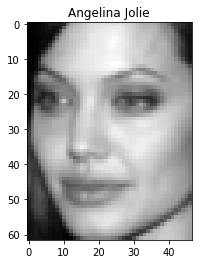

In [9]:
#Take one test image of a person
plt.imshow(test_X[1].reshape((h, w)), cmap=plt.cm.gray)
plt.title(target_names[test_y[1]])

Text(0.5, 1.0, 'Angelina Jolie')

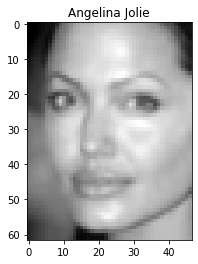

In [20]:
#Testing the algorithm for face recognition

#Compute scalar projection of face onto the base-faces
f = test_X[1] - avgFace

test_projection = U.T @ f
test_projection=test_projection.reshape(2720,1)

#For each face in train compute projection onto base-faces
train_projections = U.T @ trainFaces.T 

#Compute distances between test sample and each of train samples and find the argmin
import scipy
norms = scipy.spatial.distance.cdist(test_projection.T,train_projections.T, 'euclidean')
closest_face = np.argmin(norms[0])

#Plot closest face from train
plt.imshow(train_X[closest_face].reshape((h, w)), cmap=plt.cm.gray)
plt.title(target_names[train_y[closest_face]])

Text(0.5, 1.0, 'Angelina Jolie')

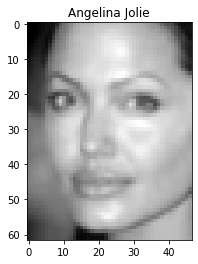

In [10]:
#Compute scalar projection of face onto the base-faces
f = test_X[1] - avgFace

test_projection = U.T @ f
test_projection=test_projection.reshape(2720,1)

#For each face in train compute projection onto base-faces
train_projections = U.T @ trainFaces.T 

#Compute distances between test sample and each of train samples and find the argmin
import scipy
norms = scipy.spatial.distance.cdist(test_projection.T,train_projections.T, 'euclidean')
closest_face = np.argmin(norms[0])

#Plot closest face from train
plt.imshow(train_X[closest_face].reshape((h, w)), cmap=plt.cm.gray)
plt.title(target_names[train_y[closest_face]])

In [11]:
#Compute scalar projection of face onto the base-faces
k = 0
for i in range(1, len(test_X)):
  f = test_X[i] - avgFace

  test_projection = U.T @ f
  test_projection=test_projection.reshape(2720,1)

  #Compute distances between test sample and each of train samples and find the argmin
  norms = scipy.spatial.distance.cdist(test_projection.T,train_projections.T, 'euclidean')
  closest_face = np.argmin(norms[0])

  if target_names[test_y[i]] == target_names[train_y[closest_face]]:
    k += 1

#Count accuracy of algorithm   

accuracy = k/len(test_X)
print(accuracy)

0.3432343234323432


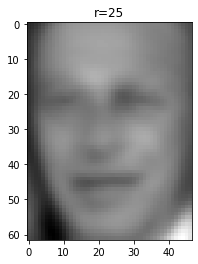

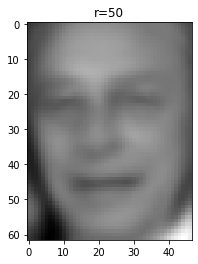

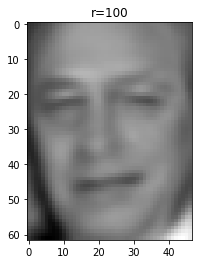

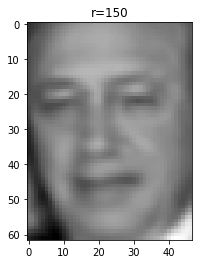

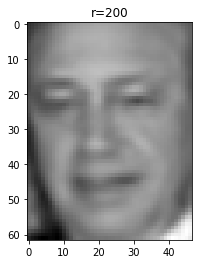

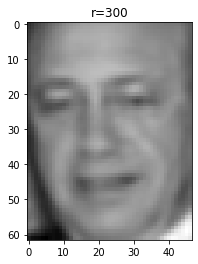

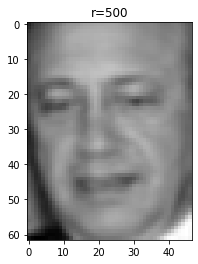

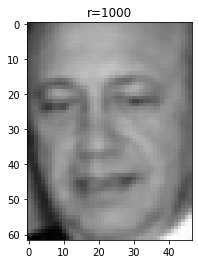

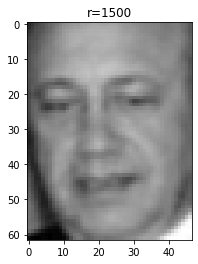

In [19]:
#Eigen face reconstruction

r_list = [25,50,100,150,200, 300, 500, 1000, 1500]

for r in r_list:
  reconFace = avgFace + U[:,:r] @ U[:,:r].T @ f
  plt.imshow(reconFace.reshape((h, w)), cmap=plt.cm.gray)
  plt.title('r='+str(r))
  plt.show()